In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

Вы получили основные навыки обработки данных, теперь пора испытать их на практике. Сейчас вам предстоит заняться задачей классификации.

Представлен датасет центра приюта животных, и вашей задачей будет обучить модель таким образом, чтобы  по определенным признакам была возможность максимально уверенно предсказать метки 'Adoption' и 'Transfer' (столбец “outcome_type”).

Здесь вы вольны делать что угодно. Я хочу видеть от вас:
1. Проверка наличия/обработка пропусков
2. Проверьте взаимосвязи между признаками
3. Попробуйте создать свои признаки
4. Удалите лишние
5. Обратите внимание на текстовые столбцы. Подумайте, что можно извлечь полезного оттуда
6. Использование профайлера вам поможет.
7. Не забывайте, что у вас есть PCA (Метод главных компонент). Он может пригодиться.

Вспомните о всем, что я говорил на предыдущих занятиях. Не все будет пригодится, но в жизни вам никто не будет говорить, что использовать :)

Хорошим классификатором для этой задачи будет "Случайный лес" (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [2]:
data = pd.read_csv('aac_shelter_outcomes.csv')
data.head(5)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [3]:
data.describe(include = 'all').transpose()

,count,unique,top,freq
age_upon_outcome,78248,46,1 year,14355
animal_id,78256,70855,A706536,11
animal_type,78256,5,Dog,44242
breed,78256,2128,Domestic Shorthair Mix,23335
color,78256,525,Black/White,8153
date_of_birth,78256,5869,2014-05-05T00:00:00,112
datetime,78256,64361,2016-04-18T00:00:00,39
monthyear,78256,64361,2016-04-18T00:00:00,39
name,54370,14574,Bella,344
outcome_subtype,35963,19,Partner,19660


In [4]:
data.isnull().sum()
# проверка наличия пропусков

age_upon_outcome        8
animal_id               0
animal_type             0
breed                   0
color                   0
date_of_birth           0
datetime                0
monthyear               0
name                23886
outcome_subtype     42293
outcome_type           12
sex_upon_outcome        2
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.isnull().sum()

age_upon_outcome    0
animal_id           0
animal_type         0
breed               0
color               0
date_of_birth       0
datetime            0
monthyear           0
name                0
outcome_subtype     0
outcome_type        0
sex_upon_outcome    0
dtype: int64

In [7]:
data.describe(include = 'all').transpose()

,count,unique,top,freq
age_upon_outcome,17699,46,1 year,2669
animal_id,17699,17460,A700840,3
animal_type,17699,4,Dog,9822
breed,17699,1010,Domestic Shorthair Mix,5837
color,17699,324,Black/White,1886
date_of_birth,17699,4385,2015-09-01T00:00:00,56
datetime,17699,14121,2016-04-18T00:00:00,39
monthyear,17699,14121,2016-04-18T00:00:00,39
name,17699,7584,Bella,76
outcome_subtype,17699,18,Partner,10863


In [8]:
data.dtypes

age_upon_outcome    object
animal_id           object
animal_type         object
breed               object
color               object
date_of_birth       object
datetime            object
monthyear           object
name                object
outcome_subtype     object
outcome_type        object
sex_upon_outcome    object
dtype: object

In [9]:
data.shape

(17699, 12)

In [10]:
data = data.drop_duplicates()
data.shape

(17698, 12)

In [11]:
data = data.drop(['name', 'animal_id', 'outcome_subtype', 'date_of_birth', 'datetime', 'monthyear'], axis=1)

In [12]:
data.sample()

,age_upon_outcome,animal_type,breed,color,outcome_type,sex_upon_outcome
1912,1 month,Cat,Domestic Shorthair Mix,Black,Transfer,Intact Female


In [59]:
labelEnc = LabelEncoder()
columns_for_encode = ["animal_type", "breed", "color", "sex_upon_outcome"]
for column in columns_for_encode:
    data[column + "_enc"] = labelEnc.fit_transform(data[column])
    
data.sample(15)

,age_upon_outcome,animal_type,breed,color,outcome_type,sex_upon_outcome,0_br,1_br,2_br,3_br,...,2_sex,3_sex,4_sex,outcome,0_age,1_age,animal_type_enc,breed_enc,color_enc,sex_upon_outcome_enc
17271,1 month,Dog,Rat Terrier Mix,White,Adoption,Spayed Female,2.0,-3.0,2.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,2,845,281,3
61531,3 years,Dog,Beagle/Dachshund,Black/Tan,Transfer,Neutered Male,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,0.0,1.0,2,129,31,2
25448,7 years,Cat,American Shorthair Mix,Calico,Transfer,Spayed Female,3.0,-3.0,3.0,2.0,...,0.0,1.0,0.0,2.0,0.0,1.0,1,42,119,3
24641,5 years,Cat,Manx Mix,White/Black,Adoption,Neutered Male,3.0,-1.0,1.0,2.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1,690,283,2
39985,1 year,Cat,Domestic Shorthair Mix,Black/White,Transfer,Neutered Male,2.0,-3.0,2.0,3.0,...,1.0,0.0,0.0,2.0,0.0,1.0,1,450,34,2
78045,8 years,Cat,Domestic Medium Hair/Manx,White/White,Adoption,Neutered Male,4.0,-3.0,3.0,2.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1,448,317,2
36859,2 years,Dog,Rat Terrier Mix,Tricolor,Transfer,Intact Male,2.0,-3.0,2.0,1.0,...,0.0,0.0,0.0,2.0,0.0,1.0,2,845,271,1
32039,4 months,Cat,Domestic Shorthair Mix,Black/White,Adoption,Spayed Female,2.0,-3.0,2.0,3.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1,450,34,3
68329,2 months,Cat,Siamese Mix,Lynx Point,Adoption,Neutered Male,2.0,-2.0,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1,913,184,2
66908,1 year,Cat,Domestic Shorthair Mix,Black,Transfer,Neutered Male,2.0,-3.0,2.0,3.0,...,1.0,0.0,0.0,2.0,0.0,1.0,1,450,4,2


In [13]:
data_adoption = data.query("outcome_type == 'Adoption'")
data_adoption.describe()

,age_upon_outcome,animal_type,breed,color,outcome_type,sex_upon_outcome
count,4983,4983,4983,4983,4983,4983
unique,29,4,408,185,1,5
top,2 months,Cat,Domestic Shorthair Mix,Black/White,Adoption,Spayed Female
freq,1594,2882,2212,504,4983,2507


In [14]:
data_adoption = data.query("outcome_type == 'Transfer'")
data_adoption.describe()

,age_upon_outcome,animal_type,breed,color,outcome_type,sex_upon_outcome
count,11106,11106,11106,11106,11106,11106
unique,44,4,821,279,1,5
top,1 year,Dog,Domestic Shorthair Mix,Black/White,Transfer,Neutered Male
freq,2063,6643,3269,1225,11106,3671


In [15]:
data.describe()

,age_upon_outcome,animal_type,breed,color,outcome_type,sex_upon_outcome
count,17698,17698,17698,17698,17698,17698
unique,46,4,1010,324,5,5
top,1 year,Dog,Domestic Shorthair Mix,Black/White,Transfer,Neutered Male
freq,2669,9822,5836,1886,11106,6558


In [16]:
unique_breed = np.unique(data[['breed']])
print(len(unique_breed))
print(unique_breed)

1010
['Abyssinian Mix' 'Affenpinscher Mix' 'Afghan Hound/Labrador Retriever'
 ... 'Yorkshire Terrier/Miniature Poodle'
 'Yorkshire Terrier/Miniature Schnauzer' 'Yorkshire Terrier/Rat Terrier']


In [17]:
from sklearn.feature_extraction import FeatureHasher
fh = FeatureHasher(n_features=10, input_type='string')
hashed_features = fh.fit_transform(data['breed'])
hashed_features = hashed_features.toarray()

In [18]:
data.shape

(17698, 6)

In [19]:
hashed_features.shape

(17698, 10)

In [20]:
hashed_df = pd.DataFrame(hashed_features).add_suffix('_br')

In [21]:
hashed_df.index = data.index

In [22]:
data = pd.concat([data, hashed_df], axis = 1)
data.head(30)

,age_upon_outcome,animal_type,breed,color,outcome_type,sex_upon_outcome,0_br,1_br,2_br,3_br,4_br,5_br,6_br,7_br,8_br,9_br
1,1 year,Dog,Beagle Mix,White/Brown,Transfer,Spayed Female,2.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
3,9 years,Dog,Miniature Schnauzer Mix,White,Transfer,Neutered Male,4.0,-3.0,4.0,1.0,-2.0,0.0,0.0,-1.0,-1.0,1.0
5,4 months,Dog,Leonberger Mix,Brown/White,Transfer,Intact Male,1.0,-3.0,0.0,2.0,-1.0,2.0,0.0,0.0,0.0,3.0
7,3 years,Dog,Chihuahua Shorthair Mix,Brown,Transfer,Spayed Female,4.0,-4.0,4.0,2.0,0.0,-3.0,0.0,0.0,-1.0,-1.0
9,3 months,Cat,Domestic Shorthair Mix,White/Black,Adoption,Spayed Female,2.0,-3.0,2.0,3.0,0.0,0.0,2.0,-1.0,-1.0,-2.0
11,2 years,Dog,Papillon/Border Collie,Black/White,Transfer,Neutered Male,1.0,-4.0,4.0,3.0,-1.0,2.0,-1.0,0.0,0.0,4.0
12,2 months,Dog,Chihuahua Shorthair/Pomeranian,Black,Adoption,Neutered Male,5.0,-5.0,3.0,2.0,-2.0,-2.0,1.0,0.0,-1.0,1.0
15,2 years,Dog,Rat Terrier Mix,White/Black,Transfer,Neutered Male,2.0,-3.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0,2.0
16,1 year,Dog,Pit Bull Mix,Brown Brindle/White,Transfer,Neutered Male,1.0,-3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0
18,2 months,Dog,German Shepherd/Labrador Retriever,Black/White,Adoption,Spayed Female,3.0,-3.0,2.0,0.0,-1.0,4.0,0.0,0.0,-1.0,10.0


In [23]:
# то же самое делаем для color
unique_color = np.unique(data[['color']])
fh = FeatureHasher(n_features=10, input_type='string')
hashed_features = fh.fit_transform(data['color'])
hashed_features = hashed_features.toarray()
hashed_df = pd.DataFrame(hashed_features).add_suffix('_color')
hashed_df.index = data.index
data = pd.concat([data, hashed_df], axis = 1)
data.head()

,age_upon_outcome,animal_type,breed,color,outcome_type,sex_upon_outcome,0_br,1_br,2_br,3_br,...,0_color,1_color,2_color,3_color,4_color,5_color,6_color,7_color,8_color,9_color
1,1 year,Dog,Beagle Mix,White/Brown,Transfer,Spayed Female,2.0,-1.0,0.0,1.0,...,0.0,-2.0,-1.0,1.0,-2.0,0.0,0.0,0.0,0.0,1.0
3,9 years,Dog,Miniature Schnauzer Mix,White,Transfer,Neutered Male,4.0,-3.0,4.0,1.0,...,0.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0
5,4 months,Dog,Leonberger Mix,Brown/White,Transfer,Intact Male,1.0,-3.0,0.0,2.0,...,0.0,-2.0,-1.0,1.0,-2.0,0.0,0.0,0.0,0.0,1.0
7,3 years,Dog,Chihuahua Shorthair Mix,Brown,Transfer,Spayed Female,4.0,-4.0,4.0,2.0,...,0.0,-1.0,-1.0,1.0,-1.0,1.0,0.0,0.0,0.0,0.0
9,3 months,Cat,Domestic Shorthair Mix,White/Black,Adoption,Spayed Female,2.0,-3.0,2.0,3.0,...,1.0,-2.0,0.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,1.0


In [24]:
data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age_upon_outcome,17698,46,1 year,2669,NaN,NaN,NaN,NaN,NaN,NaN,NaN
animal_type,17698,4,Dog,9822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
breed,17698,1010,Domestic Shorthair Mix,5836,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,17698,324,Black/White,1886,NaN,NaN,NaN,NaN,NaN,NaN,NaN
outcome_type,17698,5,Transfer,11106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex_upon_outcome,17698,5,Neutered Male,6558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0_br,17698,NaN,NaN,NaN,2.18691,0.976982,0,2,2,3,7
1_br,17698,NaN,NaN,NaN,-3.09696,1.05592,-8,-4,-3,-3,0
2_br,17698,NaN,NaN,NaN,2.6351,1.35507,-2,2,2,4,11
3_br,17698,NaN,NaN,NaN,2.00407,1.00902,-1,1,2,3,7


In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder()

In [26]:
cat_features = data['animal_type']
enc = preprocessing.LabelEncoder()
enc.fit(cat_features)
new_cat_features = enc.transform(cat_features)
print(new_cat_features) 

[2 2 2 ... 2 2 2]


In [27]:
new_cat_features = new_cat_features.reshape(-1, 1) 
ohe = preprocessing.OneHotEncoder(sparse=False) 
x = ohe.fit_transform(new_cat_features)
print(x)

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


/Users/svetlana/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [28]:
animal_type_df = pd.DataFrame(x).add_suffix('_an')

In [29]:
animal_type_df.index = data.index

In [30]:
data = pd.concat([data, animal_type_df], axis=1)

In [31]:
data.head()

,age_upon_outcome,animal_type,breed,color,outcome_type,sex_upon_outcome,0_br,1_br,2_br,3_br,...,4_color,5_color,6_color,7_color,8_color,9_color,0_an,1_an,2_an,3_an
1,1 year,Dog,Beagle Mix,White/Brown,Transfer,Spayed Female,2.0,-1.0,0.0,1.0,...,-2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,9 years,Dog,Miniature Schnauzer Mix,White,Transfer,Neutered Male,4.0,-3.0,4.0,1.0,...,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,4 months,Dog,Leonberger Mix,Brown/White,Transfer,Intact Male,1.0,-3.0,0.0,2.0,...,-2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,3 years,Dog,Chihuahua Shorthair Mix,Brown,Transfer,Spayed Female,4.0,-4.0,4.0,2.0,...,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,3 months,Cat,Domestic Shorthair Mix,White/Black,Adoption,Spayed Female,2.0,-3.0,2.0,3.0,...,-1.0,-1.0,0.0,-1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [32]:
# то же самое сделаем с sex_upon_outcome
cat_features = data['sex_upon_outcome']
enc.fit(cat_features)
new_cat_features = enc.transform(cat_features).reshape(-1, 1)
x = ohe.fit_transform(new_cat_features)
sex_upon_outcome_df = pd.DataFrame(x).add_suffix('_sex')
sex_upon_outcome_df.index = data.index
data = pd.concat([data, sex_upon_outcome_df], axis=1)
data.head()

/Users/svetlana/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,age_upon_outcome,animal_type,breed,color,outcome_type,sex_upon_outcome,0_br,1_br,2_br,3_br,...,9_color,0_an,1_an,2_an,3_an,0_sex,1_sex,2_sex,3_sex,4_sex
1,1 year,Dog,Beagle Mix,White/Brown,Transfer,Spayed Female,2.0,-1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,9 years,Dog,Miniature Schnauzer Mix,White,Transfer,Neutered Male,4.0,-3.0,4.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,4 months,Dog,Leonberger Mix,Brown/White,Transfer,Intact Male,1.0,-3.0,0.0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,3 years,Dog,Chihuahua Shorthair Mix,Brown,Transfer,Spayed Female,4.0,-4.0,4.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,3 months,Cat,Domestic Shorthair Mix,White/Black,Adoption,Spayed Female,2.0,-3.0,2.0,3.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
# и с outcome_type
def f(row):
    if str('Adoption') in row['outcome_type']:
        val = '1.0'
    elif str('Transfer') in row['outcome_type']:
        val = '2.0'
    else:
        val = '0'
    return val
data['outcome'] = data.apply(f, axis=1)

In [37]:
data['age1'] = data['age_upon_outcome'].str.extract('(\d+)')

In [38]:
data['age2'] = data['age_upon_outcome'].str.replace('\d+', '')

In [39]:
data.head()

,age_upon_outcome,animal_type,breed,color,outcome_type,sex_upon_outcome,0_br,1_br,2_br,3_br,...,2_an,3_an,0_sex,1_sex,2_sex,3_sex,4_sex,outcome,age1,age2
1,1 year,Dog,Beagle Mix,White/Brown,Transfer,Spayed Female,2.0,-1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1,year
3,9 years,Dog,Miniature Schnauzer Mix,White,Transfer,Neutered Male,4.0,-3.0,4.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,9,years
5,4 months,Dog,Leonberger Mix,Brown/White,Transfer,Intact Male,1.0,-3.0,0.0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,4,months
7,3 years,Dog,Chihuahua Shorthair Mix,Brown,Transfer,Spayed Female,4.0,-4.0,4.0,2.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,3,years
9,3 months,Cat,Domestic Shorthair Mix,White/Black,Adoption,Spayed Female,2.0,-3.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3,months


In [40]:
def f(row):
    if str('month') in row['age2'] or str('months') in row['age2']:
        val = 'Puppy'
    else:
        val = 'grown-up'
    return val

In [41]:
data['age'] = data.apply(f, axis=1)

In [42]:
data['age'].value_counts()

grown-up    10697
Puppy        7001
Name: age, dtype: int64

In [43]:
cat_features = data['age']
enc.fit(cat_features)
new_cat_features = enc.transform(cat_features).reshape(-1, 1)
x = ohe.fit_transform(new_cat_features)
sex_upon_outcome_df = pd.DataFrame(x).add_suffix('_age')
sex_upon_outcome_df.index = data.index
data = pd.concat([data, sex_upon_outcome_df], axis=1)
data.head()

/Users/svetlana/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,age_upon_outcome,animal_type,breed,color,outcome_type,sex_upon_outcome,0_br,1_br,2_br,3_br,...,1_sex,2_sex,3_sex,4_sex,outcome,age1,age2,age,0_age,1_age
1,1 year,Dog,Beagle Mix,White/Brown,Transfer,Spayed Female,2.0,-1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,2.0,1,year,grown-up,0.0,1.0
3,9 years,Dog,Miniature Schnauzer Mix,White,Transfer,Neutered Male,4.0,-3.0,4.0,1.0,...,0.0,1.0,0.0,0.0,2.0,9,years,grown-up,0.0,1.0
5,4 months,Dog,Leonberger Mix,Brown/White,Transfer,Intact Male,1.0,-3.0,0.0,2.0,...,1.0,0.0,0.0,0.0,2.0,4,months,Puppy,1.0,0.0
7,3 years,Dog,Chihuahua Shorthair Mix,Brown,Transfer,Spayed Female,4.0,-4.0,4.0,2.0,...,0.0,0.0,1.0,0.0,2.0,3,years,grown-up,0.0,1.0
9,3 months,Cat,Domestic Shorthair Mix,White/Black,Adoption,Spayed Female,2.0,-3.0,2.0,3.0,...,0.0,0.0,1.0,0.0,1.0,3,months,Puppy,1.0,0.0


In [44]:
data = data.drop(columns={'age','age1', 'age2'})
data_final = data.drop(data.columns[0:6], axis=1)
data_final.head()

,0_br,1_br,2_br,3_br,4_br,5_br,6_br,7_br,8_br,9_br,...,2_an,3_an,0_sex,1_sex,2_sex,3_sex,4_sex,outcome,0_age,1_age
1,2.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0
3,4.0,-3.0,4.0,1.0,-2.0,0.0,0.0,-1.0,-1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0
5,1.0,-3.0,0.0,2.0,-1.0,2.0,0.0,0.0,0.0,3.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
7,4.0,-4.0,4.0,2.0,0.0,-3.0,0.0,0.0,-1.0,-1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0
9,2.0,-3.0,2.0,3.0,0.0,0.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [46]:
x_columns =[x for x in data_final.columns if x != 'outcome']
X = data_final[x_columns]
y = data_final['outcome']

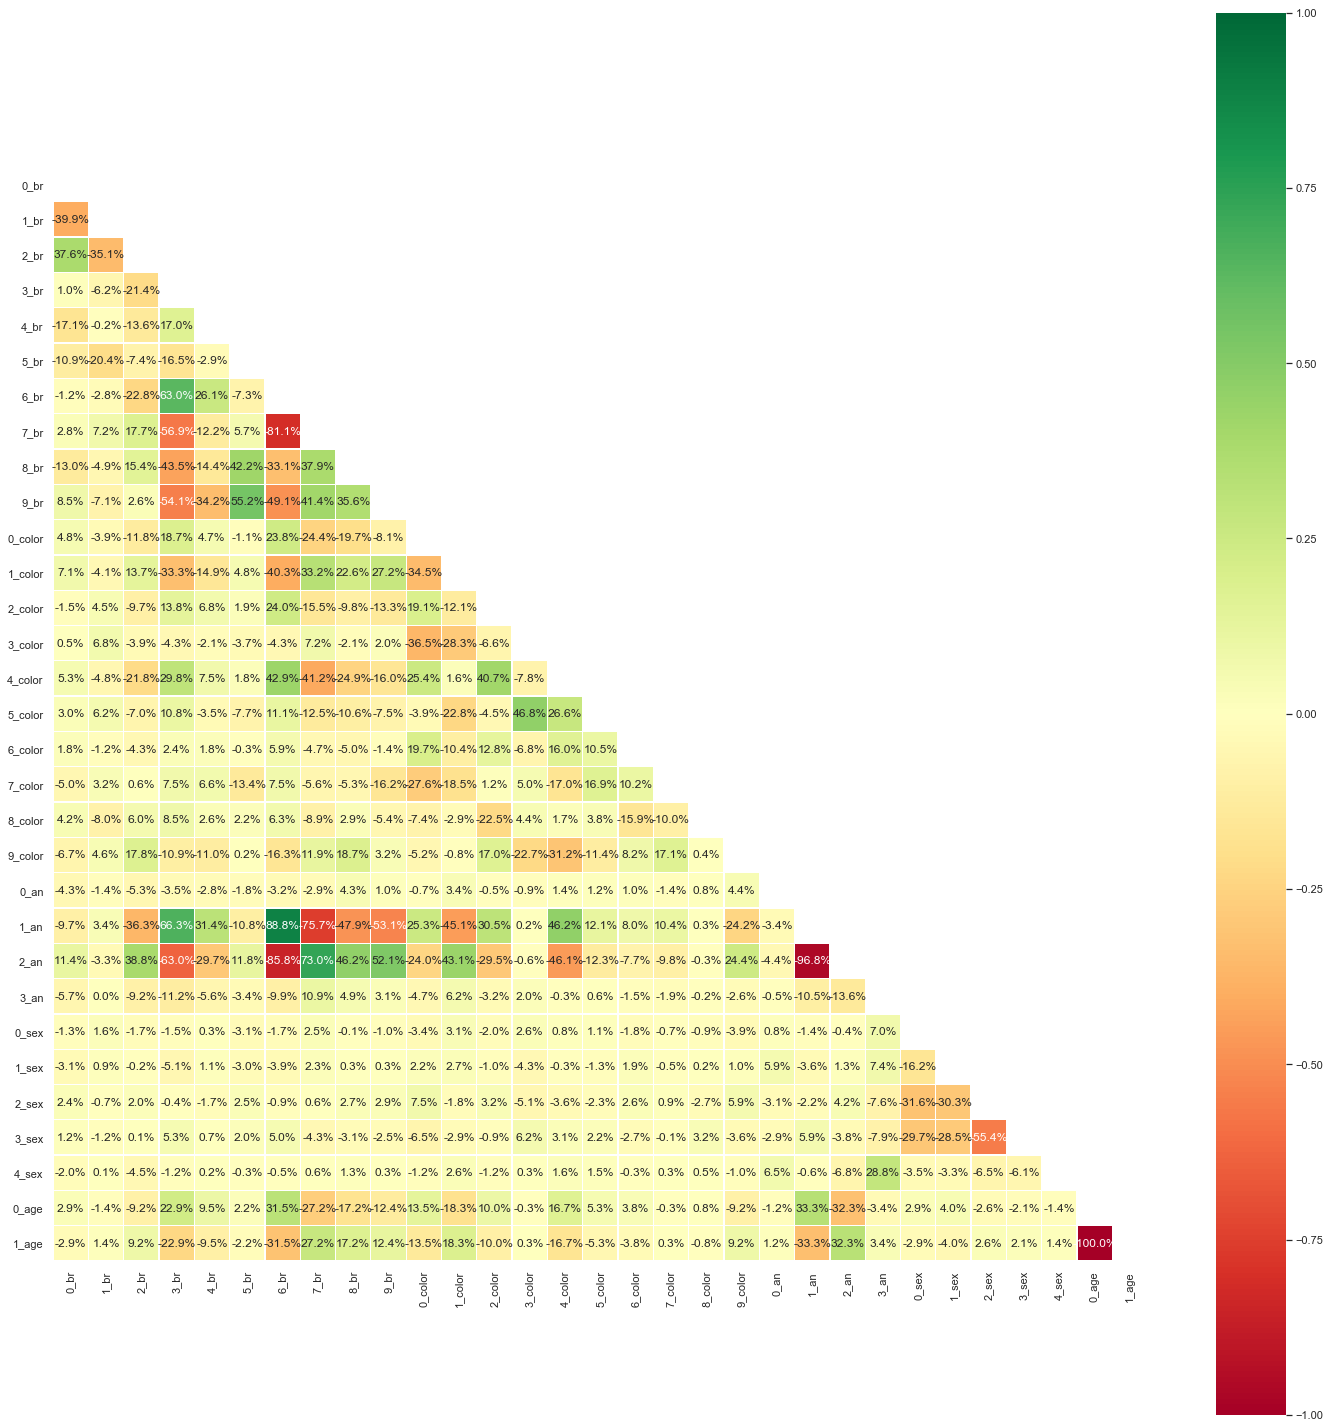

In [47]:
plt.figure(figsize = (20,20))
corr = data_final.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
        data=corr,
        mask=mask,
        annot=True,
        cmap='RdYlGn',
        fmt="0.1%",
        linewidths=0.3,
        square=True,
        center=0
)
plt.tight_layout()
plt.show()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5)

In [49]:
from sklearn.metrics import mean_absolute_error
model=RandomForestRegressor(n_estimators=500)
model.fit(X_train,y_train)
y_pred_rfr = model.predict(X_test)
print("MAE: {:.3f}".format(mean_absolute_error(y_test, y_pred_rfr)))

MAE: 0.497


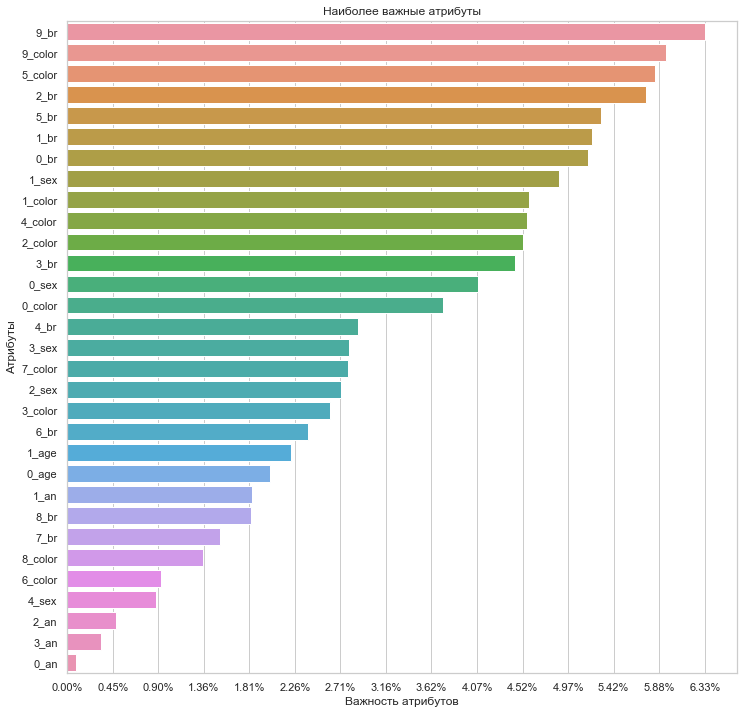

,0
9_br,0.063271
9_color,0.059421
5_color,0.058337
2_br,0.057480
5_br,0.052997
1_br,0.052067
0_br,0.051665
1_sex,0.048801
1_color,0.045832
4_color,0.045632


In [50]:
headers = list(X_train.columns.values)
# Важность признаков
feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x=feature_imp, y=feature_imp.index)
x_ticks = np.linspace(start = 0, stop=max(feature_imp), num =  15, endpoint = True)
plt.xticks(x_ticks, [f"{x:0.2%}" for x in x_ticks])
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")

# Важность на графике
plt.show()
# И в DataFrame
pd.DataFrame(feature_imp)